<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetetion/blob/main/topic_modelling_fakenews_LDA_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install wordcloud pyLDAvis

In [4]:
import pyLDAvis
# import pyLDAvis.sklearn
import pandas as pd
import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

In [6]:
data = pd.read_csv("Fake.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # Load BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

In [7]:
# Preprocessing
def preprocess_text(text):
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ["more", "good", "one", "two","via"]
    stop_words.update(custom_stopwords)

    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]


    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstruct text
    processed_text = ' '.join(tokens)
    return processed_text



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Apply preprocessing to your dataset
data['processed_text'] = data['text'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Feature extraction - CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(data['processed_text'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Apply LDA
num_topics = 25
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda_model.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    # top_words = [vectorizer.get_feature_names()[i] for i in top_words_idx]
    print(f"Topic {topic_idx}:")
    print(top_words)


Topic 0:
['shooting', 'medium', 'attack', 'story', 'fbi', 'event', 'shooter', 'also', 'security', 'report']
Topic 1:
['clinton', 'hillary', 'sander', 'campaign', 'bernie', 'foundation', 'democratic', 'bill', 'presidential', 'political']
Topic 2:
['people', 'cruz', 'republican', 'care', 'would', 'health', 'bill', 'said', 'image', 'like']
Topic 3:
['gun', 'people', 'right', 'amendment', 'would', 'like', 'violence', 'nra', 'nazi', 'control']
Topic 4:
['news', 'medium', 'climate', 'century', 'wire', 'time', 'hollywood', 'new', 'change', 'film']
Topic 5:
['state', 'world', 'united', 'country', 'iran', 'nation', 'american', 'nuclear', 'north', 'would']
Topic 6:
['police', 'officer', 'said', 'man', 'county', 'video', 'crime', 'city', 'cop', 'arrested']
Topic 7:
['investigation', 'russian', 'attorney', 'fbi', 'intelligence', 'trump', 'russia', 'general', 'moore', 'former']
Topic 8:
['woman', 'sexual', 'said', 'men', 'girl', 'rape', 'player', 'national', 'assault', 'nfl']
Topic 9:
['trump', 'ne

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


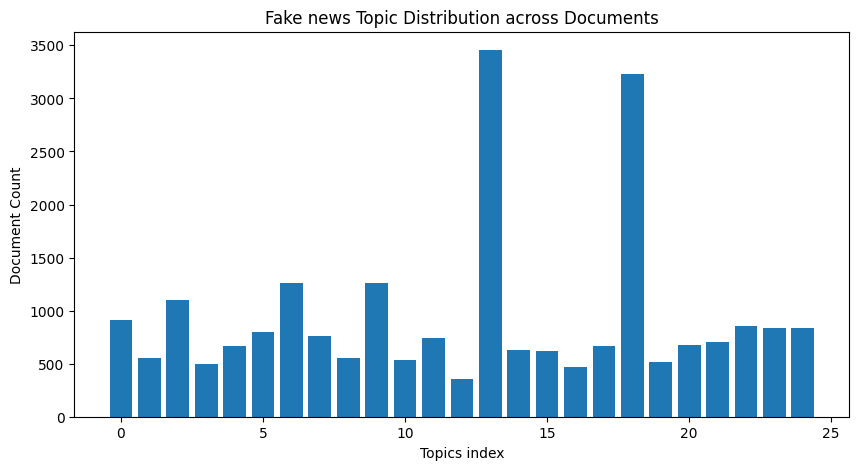

In [12]:
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution)

plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel('Topics index')
plt.ylabel('Document Count')
plt.title('Fake news Topic Distribution across Documents')
plt.show()

In [18]:
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
num_words = 100

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-num_words:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    word_importance = np.exp(topic[top_words_idx])

    # Create a bar plot using Plotly
    fig = px.bar(x=word_importance, y=top_words, orientation='h')
    fig.update_layout(title=f"Topic {topic_idx} - Most Important Fake News Key Word", xaxis_title="Word Importance")
    fig.show()






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



<ipython-input-22-c7442fb56756>:6: RuntimeWarning:

overflow encountered in exp



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



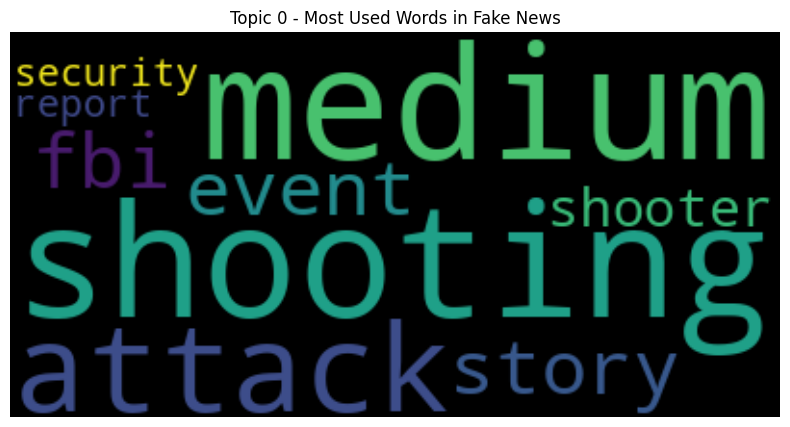

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



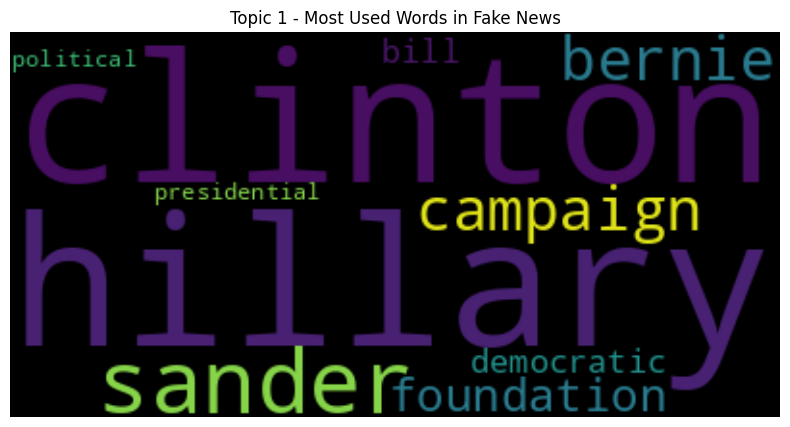

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



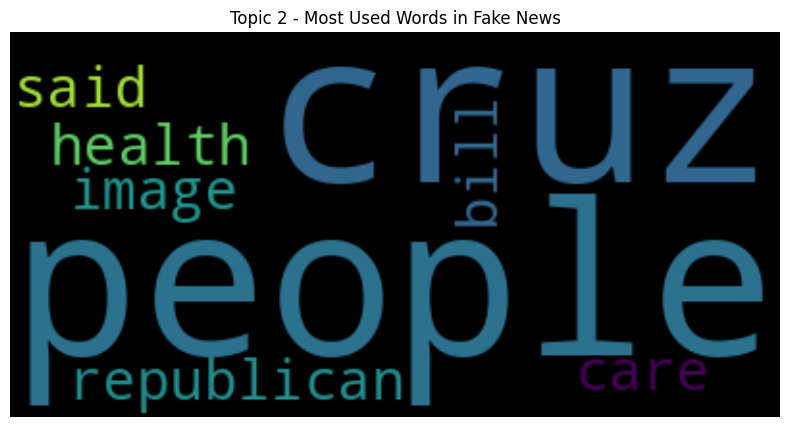

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



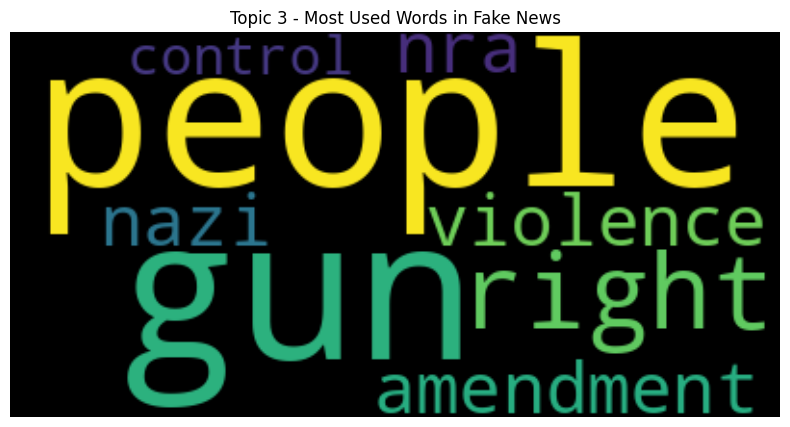

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



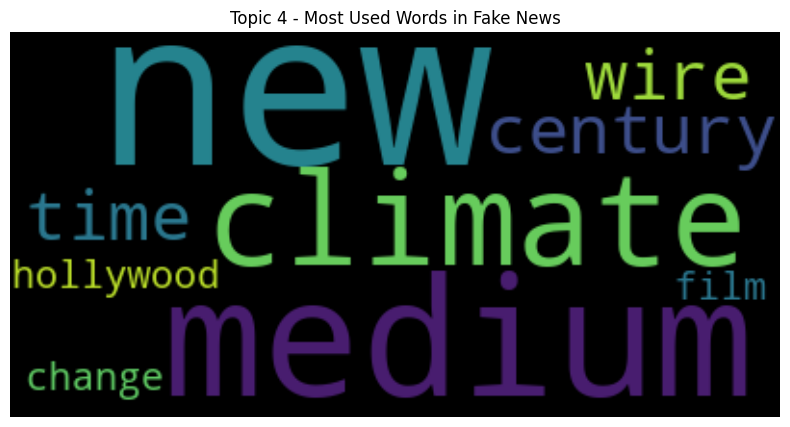

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



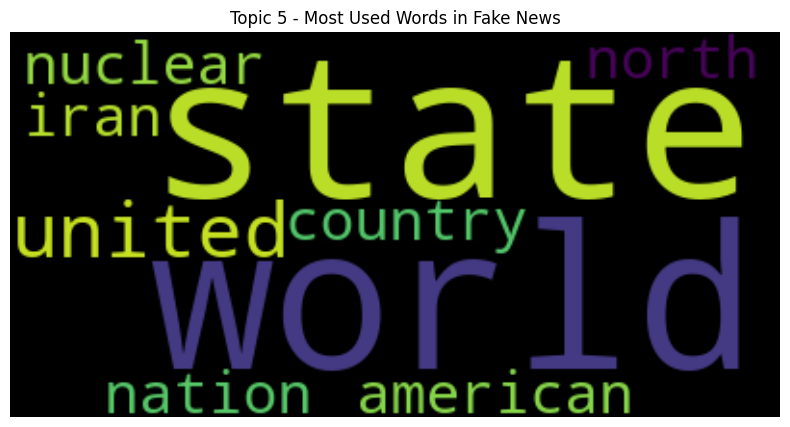

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



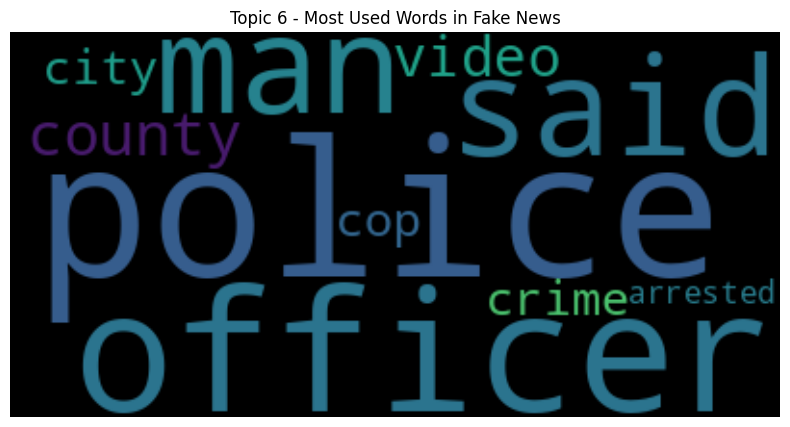

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



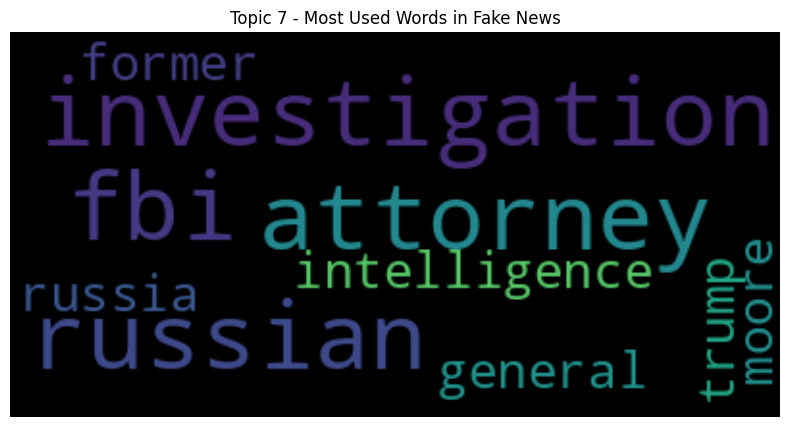

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



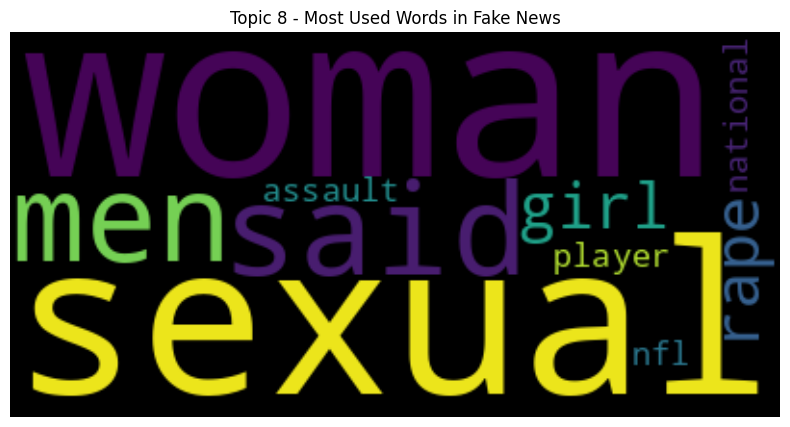

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



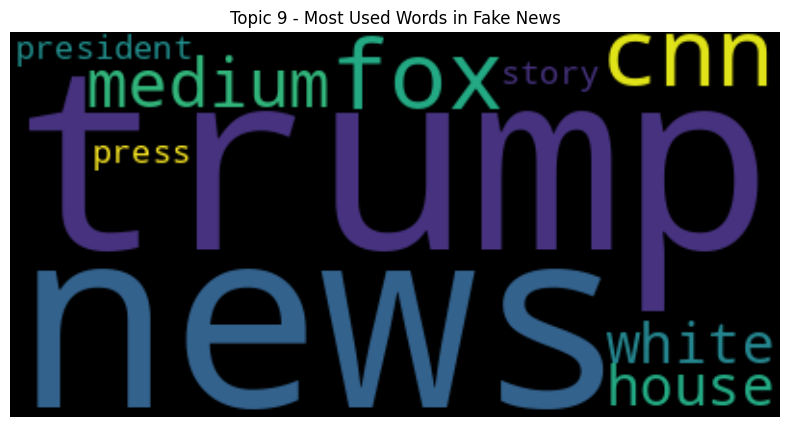

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



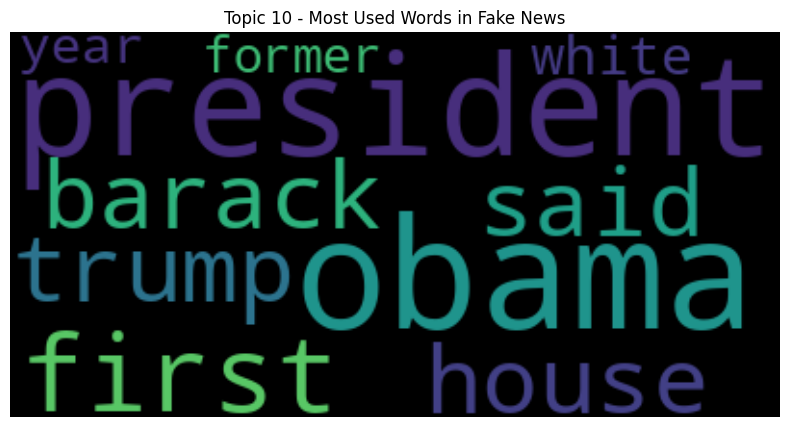

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



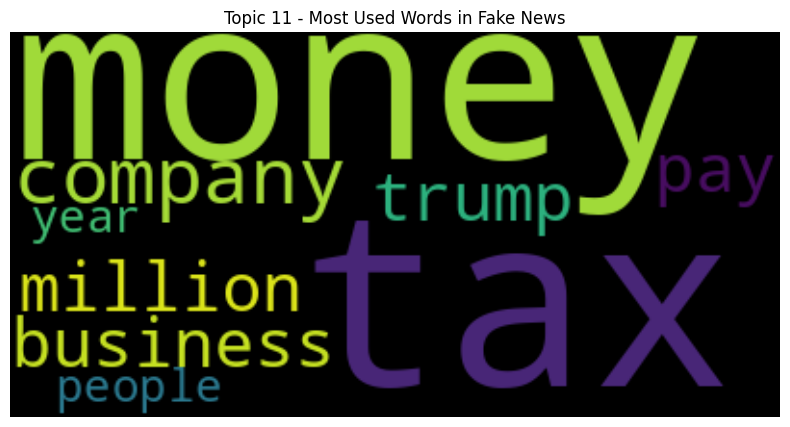

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



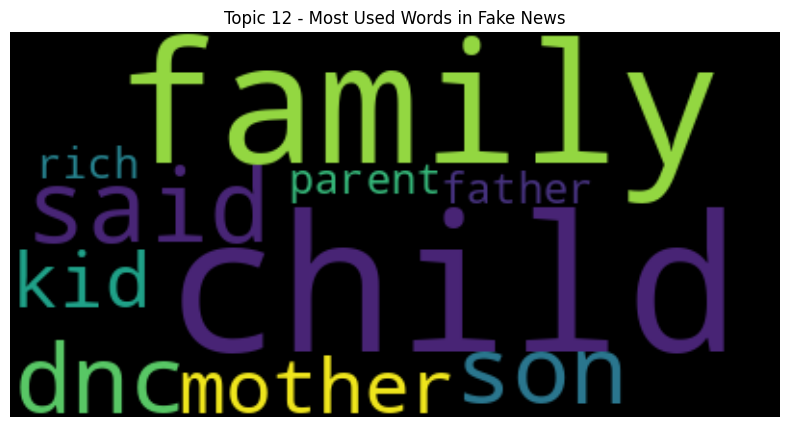

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



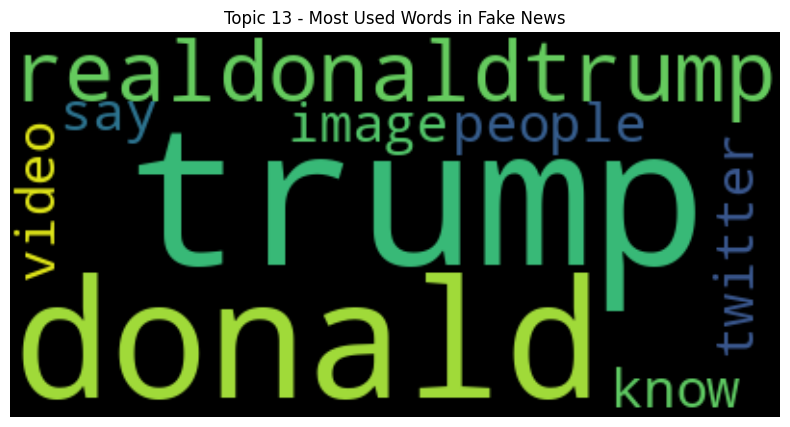

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



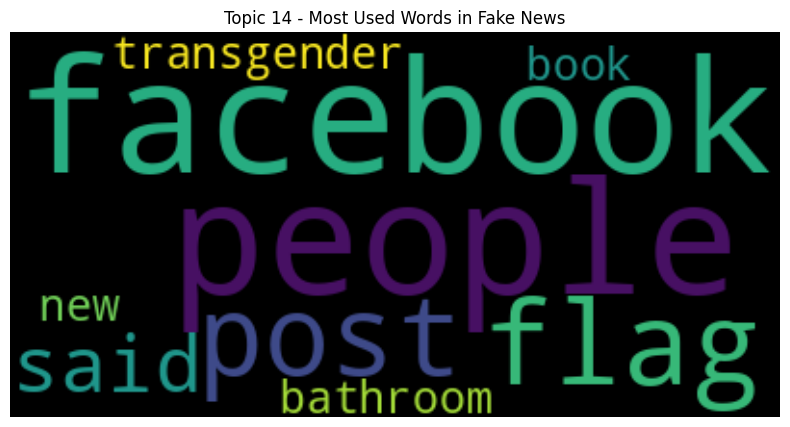

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



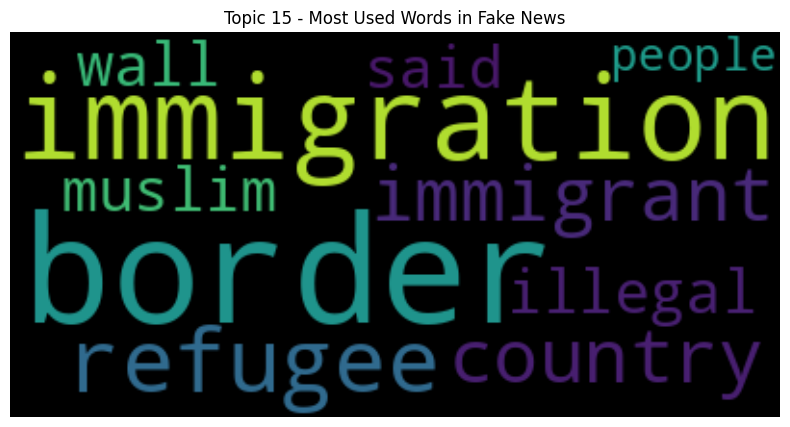

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



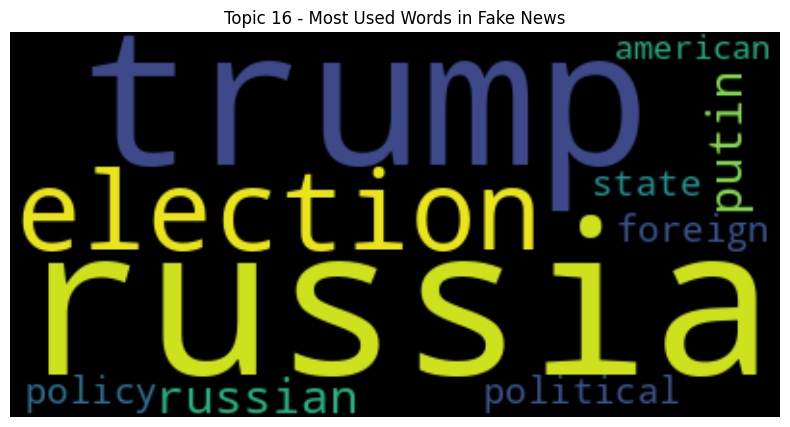

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



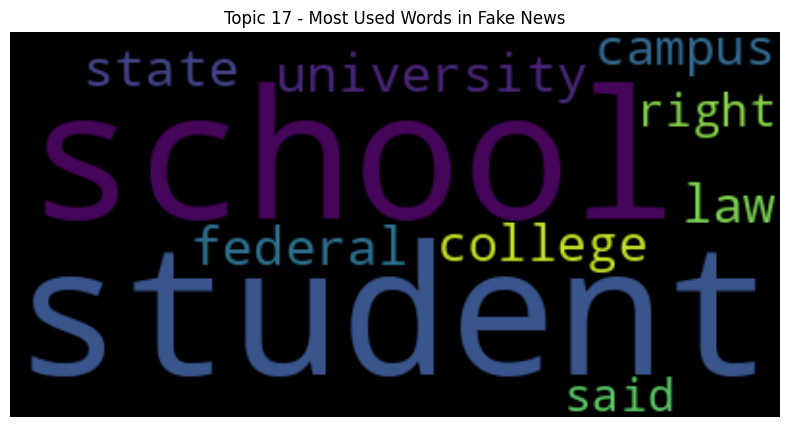

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



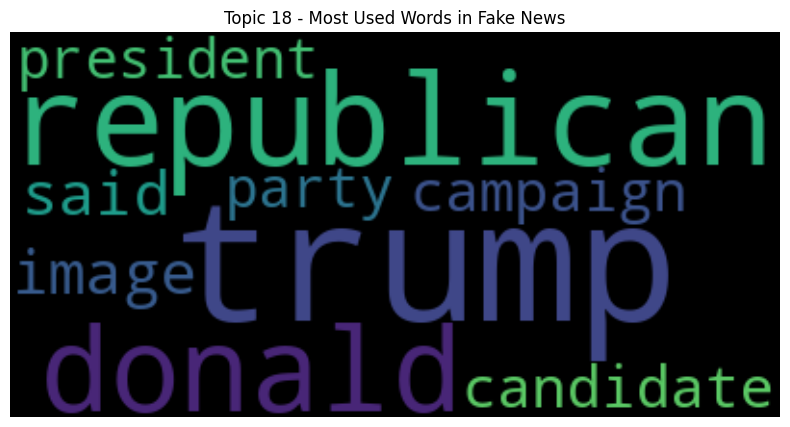

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



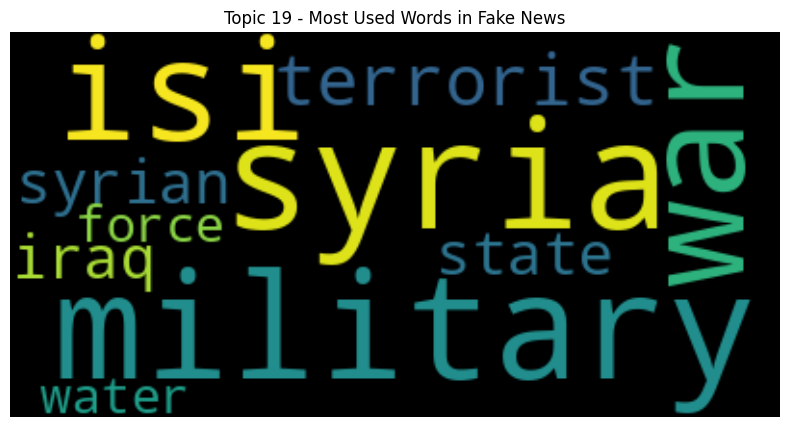

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



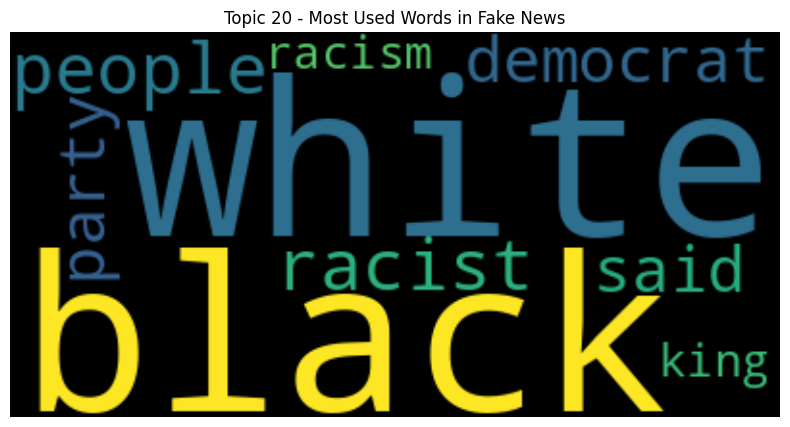

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



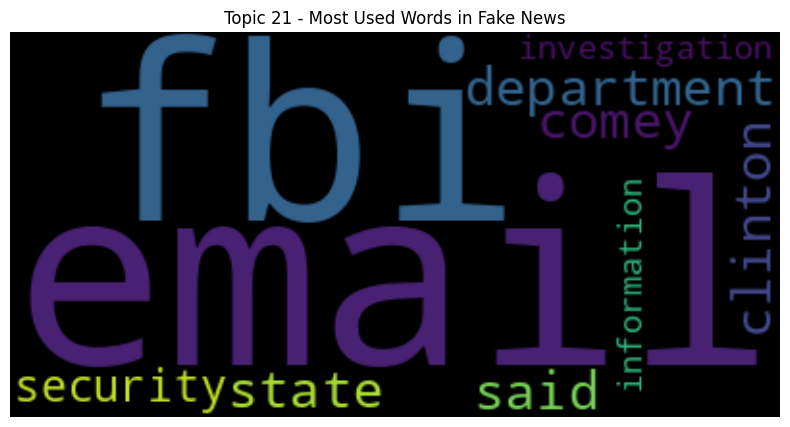

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



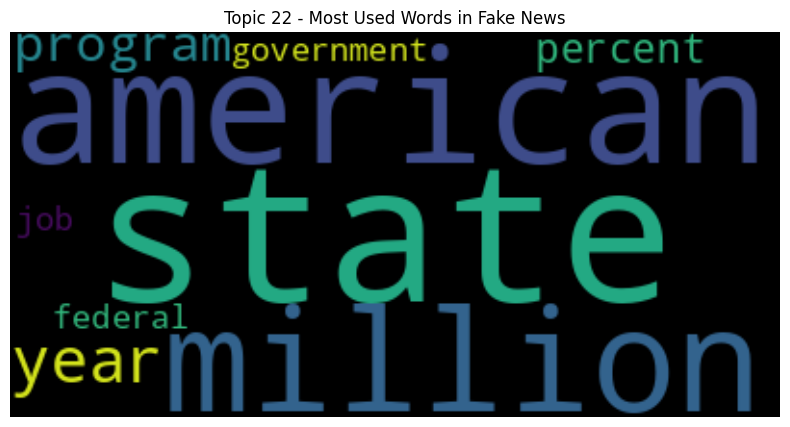

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



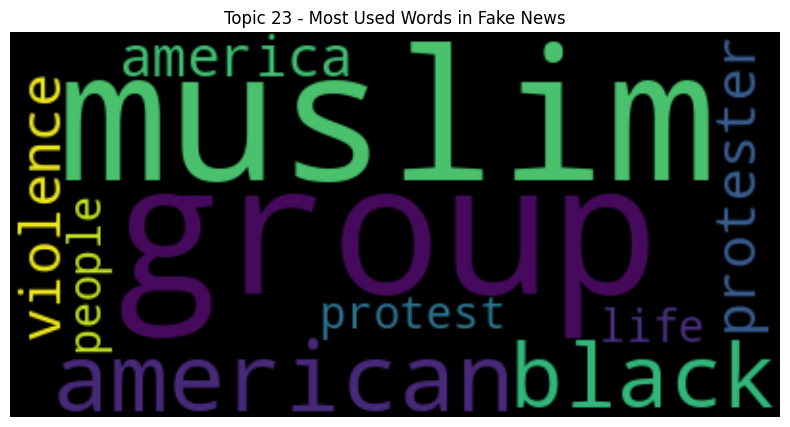

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



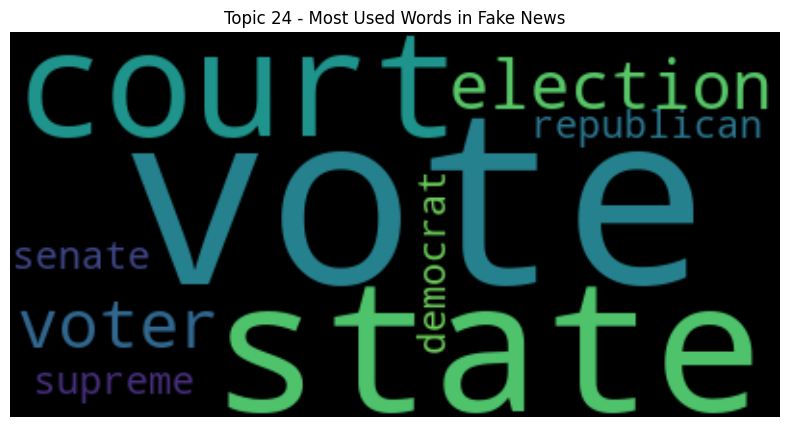

In [34]:
# Iterate through each topic
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]  # Assuming you have a list of feature names
    topic_words = ' '.join(top_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='black').generate(topic_words)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} - Most Used Words in Fake News")
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-1.099999999997702,
 1.0999999999980492,
 -1.0999999999830783,
 1.099999999996522)

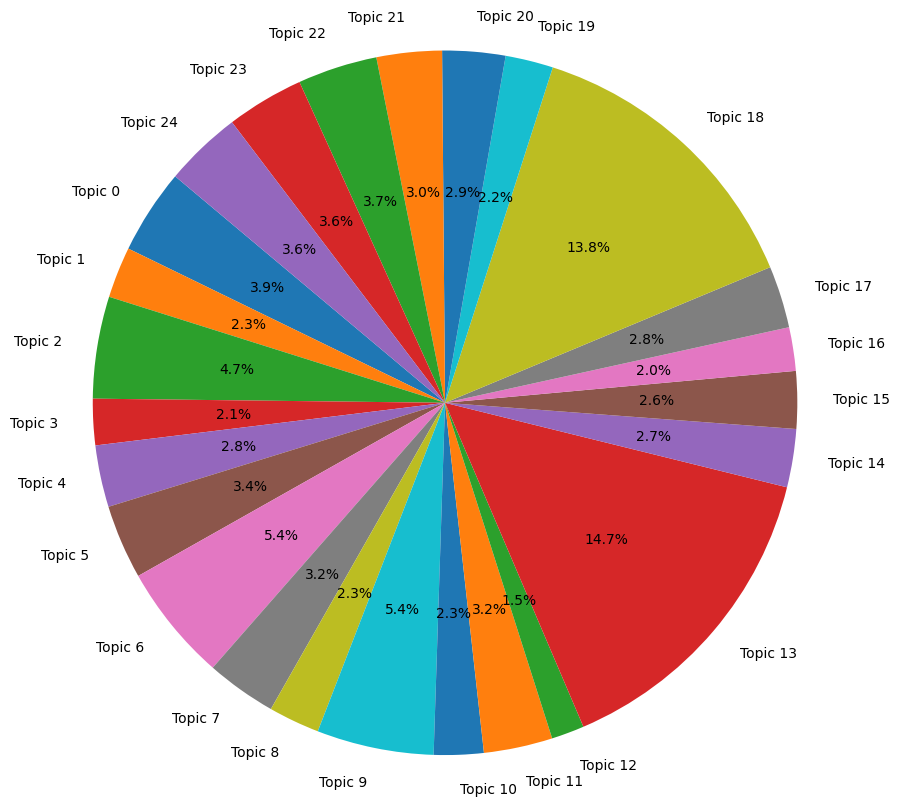

In [36]:

total_documents = len(data)
topic_distribution = topic_matrix.argmax(axis=1)
topic_counts = np.bincount(topic_distribution, minlength=num_topics)

plt.figure(figsize=(10, 10))
plt.pie(topic_counts, labels=[f"Topic {i}" for i in range(num_topics)], autopct="%1.1f%%", startangle=140)
plt.axis("equal")  # Equal aspect